In [1]:
import torch 
import numpy as np
from torch import nn
from torch.nn import functional as F
from sphere_initialization import generate_class_vectors
from sphere_initialization import generate_class_vectors_hemispheres
from siglip_loss import SigLIPLoss
from siglip_experiment import *
%load_ext autoreload
%autoreload 2

[autoreload of siglip_experiment failed: Traceback (most recent call last):
  File "/Users/iliyas/Library/Python/3.12/lib/python/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "/Users/iliyas/Library/Python/3.12/lib/python/site-packages/IPython/extensions/autoreload.py", line 475, in superreload
    module = reload(module)
             ^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/importlib/__init__.py", line 131, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 866, in _exec
  File "<frozen importlib._bootstrap_external>", line 990, in exec_module
  File "<frozen importlib._bootstrap_external>", line 1128, in get_code
  File "<frozen importlib._bootstrap_external>", line 1058, in source_to_code
  File "<frozen importlib._bootstrap>", line 488, in _call_with_frames_removed
  File "/Users/iliyas/Documents/UROP/SigLip Theory/Represent

Using device: cpu
Running experiments with: n_classes=100, dim=10, n_epochs=10000

=== Running temperature=10.0 ===
[100/10000]  loss=0.0048  T=10.0000  rb=0.8754
[200/10000]  loss=0.0044  T=10.0000  rb=0.8659
[300/10000]  loss=0.0043  T=10.0000  rb=0.8624
[400/10000]  loss=0.0042  T=10.0000  rb=0.8606
[500/10000]  loss=0.0042  T=10.0000  rb=0.8594
[600/10000]  loss=0.0041  T=10.0000  rb=0.8585
[700/10000]  loss=0.0041  T=10.0000  rb=0.8577
[800/10000]  loss=0.0041  T=10.0000  rb=0.8572
[900/10000]  loss=0.0041  T=10.0000  rb=0.8569
[1000/10000]  loss=0.0041  T=10.0000  rb=0.8566
[1100/10000]  loss=0.0041  T=10.0000  rb=0.8562
[1200/10000]  loss=0.0040  T=10.0000  rb=0.8559
[1300/10000]  loss=0.0040  T=10.0000  rb=0.8556
[1400/10000]  loss=0.0040  T=10.0000  rb=0.8553
[1500/10000]  loss=0.0040  T=10.0000  rb=0.8550
[1600/10000]  loss=0.0040  T=10.0000  rb=0.8548
[1700/10000]  loss=0.0040  T=10.0000  rb=0.8546
[1800/10000]  loss=0.0040  T=10.0000  rb=0.8544
[1900/10000]  loss=0.0040  T=

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: divide by zero encountered in divide
  return n/db/n.sum(), bin_edges
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


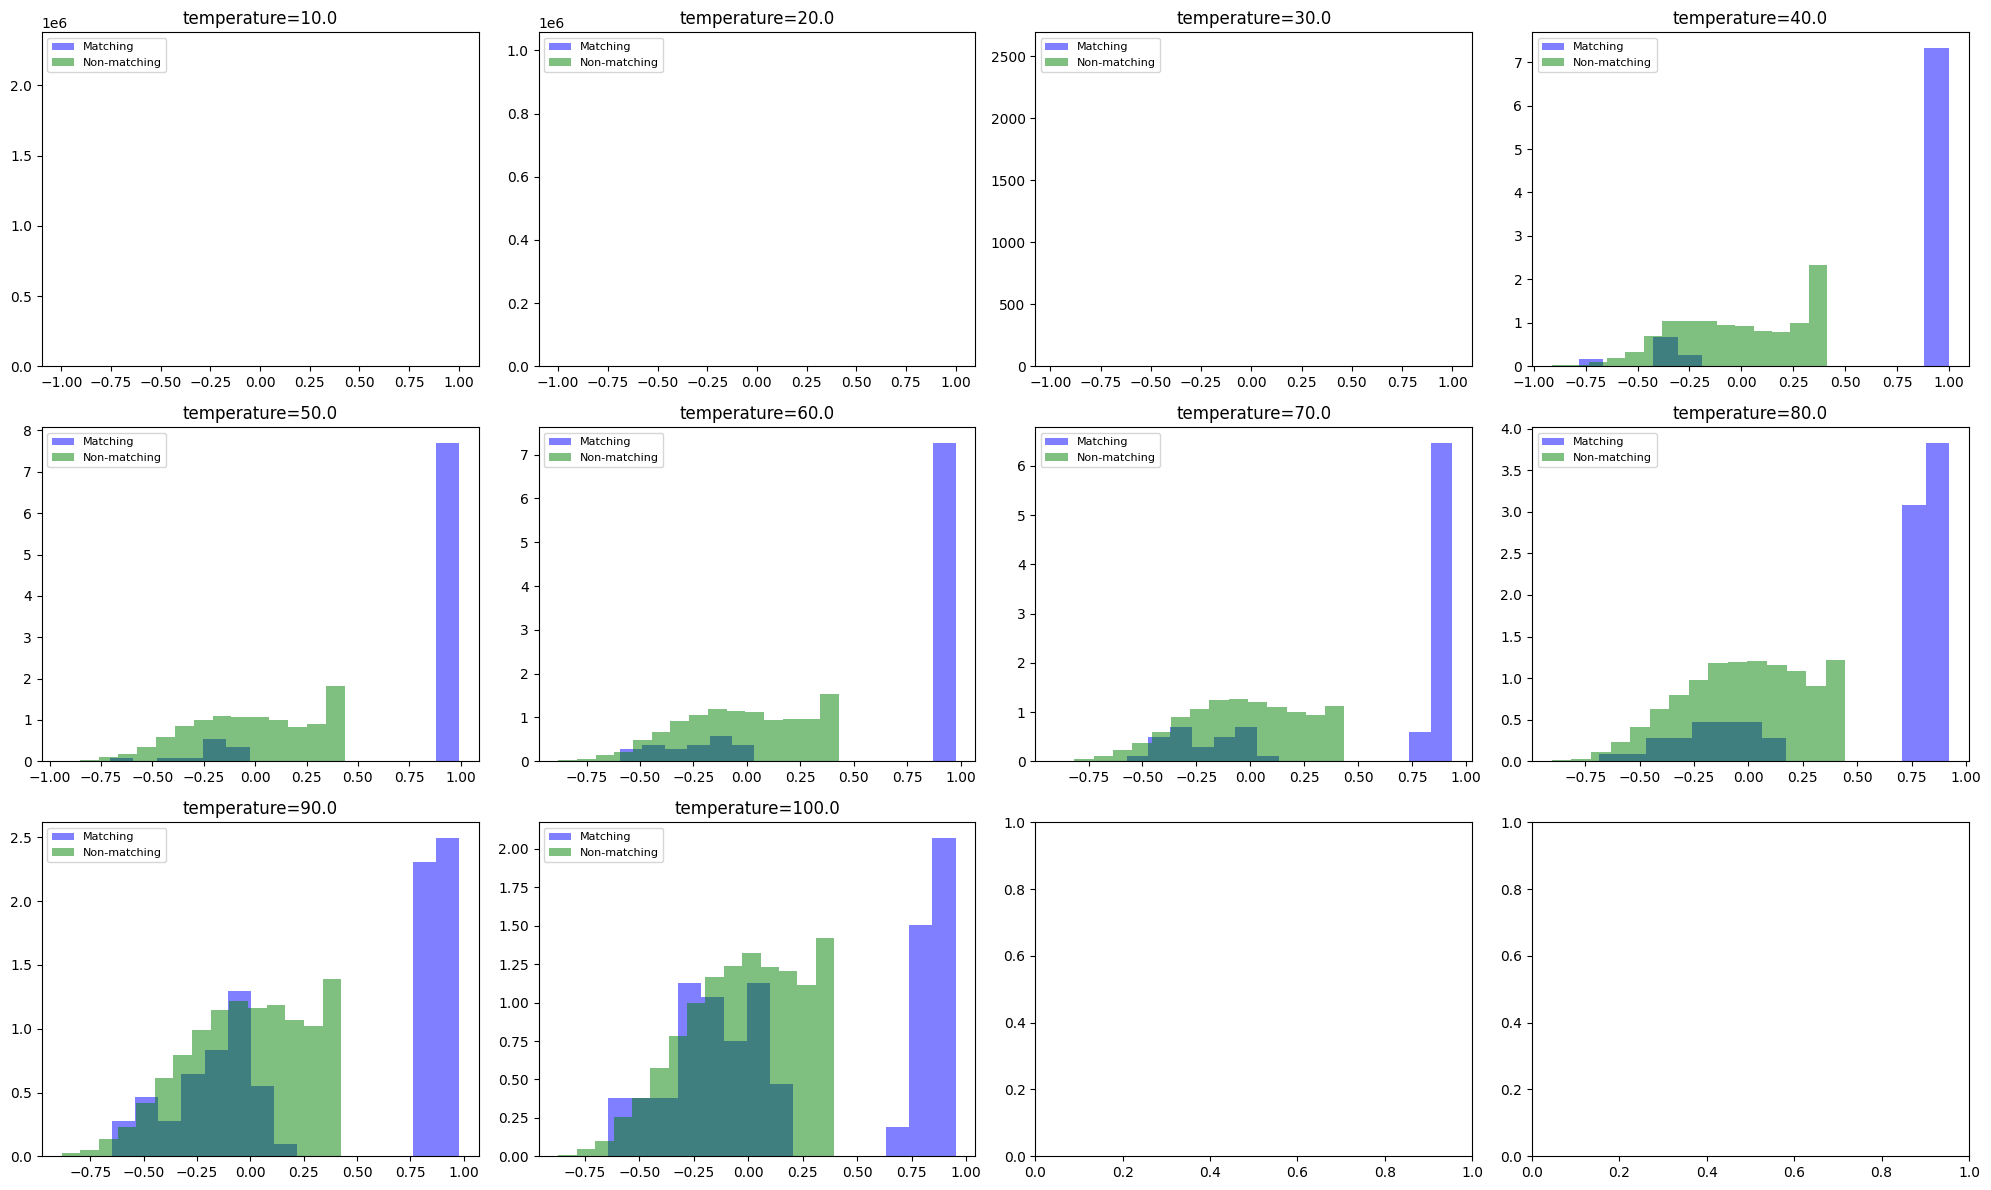


=== Sweep Results ===
   temperature  final_loss  final_temp  final_bias    margin  min_matching  \
0         10.0    0.003916   10.000000    0.852164  0.300608      0.999998   
1         20.0    0.000136   20.000000    0.750556  0.307317      1.000000   
2         30.0    0.000006   30.000002    0.730312  0.300935      0.994210   
3         40.0    0.023947   40.000000    0.724173 -0.597767     -0.782781   
4         50.0    0.023947   50.000004    0.721167 -0.570737     -0.705806   
5         60.0    0.044210   60.000004    0.676591 -0.511499     -0.593250   
6         70.0    0.053420   69.999992    0.641194 -0.504595     -0.573124   
7         80.0    0.047894   80.000000    0.628949 -0.565380     -0.686173   
8         90.0    0.088419   90.000008    0.614849 -0.536752     -0.647331   
9        100.0    0.110524  100.000008    0.571874 -0.518809     -0.643141   

   max_non_matching  
0          0.398782  
1          0.385366  
2          0.392340  
3          0.412753  
4       

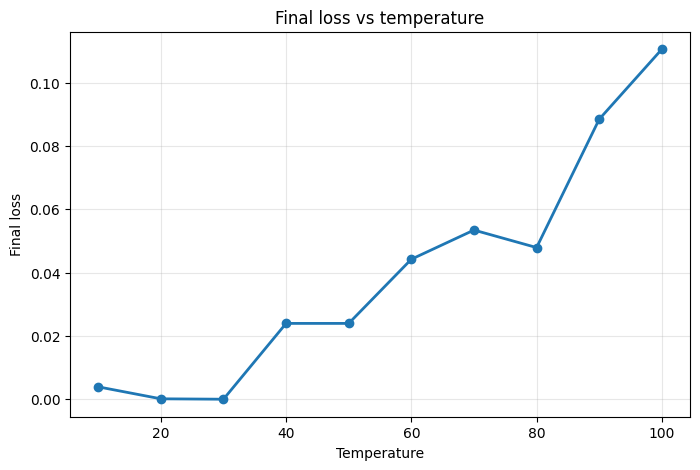

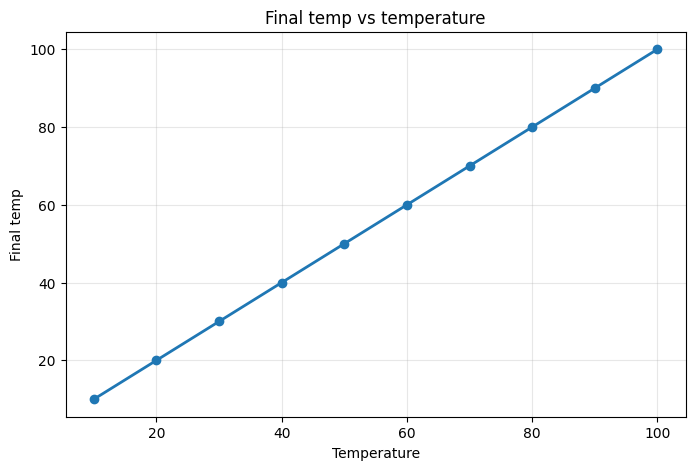

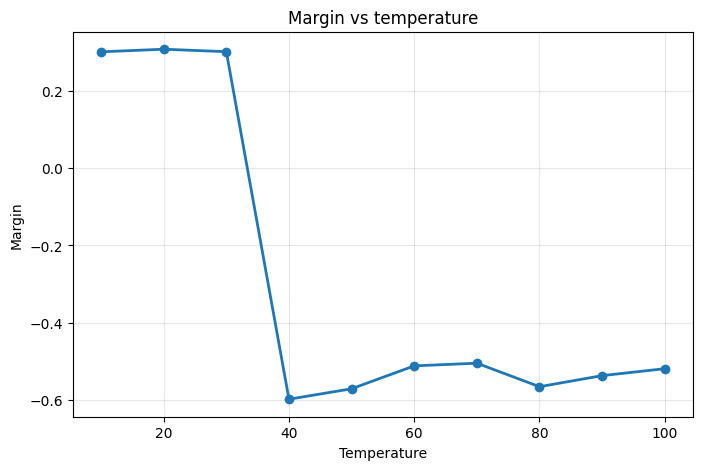

In [5]:
torch.manual_seed(50)

n_classes = 100
dim = 10
n_epochs = int(1e4)
device_str = 'cuda' if torch.cuda.is_available() else 'cpu'

initial_relative_bias = 1.0
bias_is_trainable = True
temperature_is_trainable = False

temperatures = np.linspace(10, 100, 10)  # 10 evenly spaced temperatures

print(f"Using device: {device_str}")
print(f"Running experiments with: n_classes={n_classes}, dim={dim}, n_epochs={n_epochs}")

# Create experiment instance
experiment = SigLIPExperiment(
    n_classes=n_classes,
    dim=dim,
    n_epochs=n_epochs,
    device=device_str
)

# Run sweep directly
results_df = experiment.run_sweep(
    sweep_param="temperature",
    values=temperatures,
    relative_bias=initial_relative_bias,
    trainable_bias=bias_is_trainable,
    trainable_temp=temperature_is_trainable
)
# Plot histograms for each sweep run
experiment.plot_inner_product_gaps_across_sweep(
    [U for U, V in experiment.all_UV],
    [V for U, V in experiment.all_UV],
    "temperature",
    temperatures
)
print("\n=== Sweep Results ===")
print(results_df)

# Plot final loss vs initial temperature
experiment.plot_final_metric_vs_param("temperature", "final_loss")

# Plot final temperature vs initial temperature
experiment.plot_final_metric_vs_param("temperature", "final_temp")

# Plot margin vs initial temperature
experiment.plot_final_metric_vs_param("temperature", "margin")